In [1]:
#使用多种特征进行预测
from keras.layers import Input, Dense, LSTM
from keras.models import Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import time


Using TensorFlow backend.


In [2]:

output_dim = 1
batch_size = 256
epochs = 10
seq_len = 5
hidden_size = 128


In [3]:
#panda加载csv文件
data = pd.read_csv('data_stocks.csv')
#删除时间戳列
data.drop('DATE',axis=1,inplace=True)
#将所有数据分成训练集和测试集
data_train = data.iloc[:int(data.shape[0]*0.8),:]
data_test = data.iloc[int(data.shape[0]*0.8):,:]
print(data_train.shape,data_test.shape)

#进行归一化处理
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

X_train = np.array([data_train[i:i + seq_len,:] for i in range(data_train.shape[0]-seq_len)])
y_train = np.array([data_train[i + seq_len,0] for i in range(data_train.shape[0]-seq_len)])

X_test = np.array([data_test[i:i + seq_len,:] for i in range(data_test.shape[0]-seq_len)])
y_test = np.array([data_test[i + seq_len,0] for i in range(data_test.shape[0]-seq_len)])

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)



(33012, 501) (8254, 501)
(33007, 5, 501) (33007,) (8249, 5, 501) (8249,)


In [4]:

X = Input(shape=[X_train.shape[1],X_train.shape[2],])
h = LSTM(hidden_size,activation='relu')(X)
Y = Dense(output_dim,activation='sigmoid')(h)

model = Model(X,Y)
model.compile(loss='mean_squared_error',optimizer='adam')



Epoch 1/10
33007/33007 [==============================] - 6s 174us/step - loss: 0.1113
Epoch 2/10
33007/33007 [==============================] - 5s 142us/step - loss: 0.1103
Epoch 3/10
33007/33007 [==============================] - 5s 139us/step - loss: 0.1051
Epoch 4/10
33007/33007 [==============================] - 5s 139us/step - loss: 0.1039
Epoch 5/10
33007/33007 [==============================] - 4s 136us/step - loss: 0.1056
Epoch 6/10
33007/33007 [==============================] - 5s 137us/step - loss: 0.1059
Epoch 7/10
33007/33007 [==============================] - 4s 136us/step - loss: 0.1052
Epoch 8/10
33007/33007 [==============================] - 4s 135us/step - loss: 0.1044
Epoch 9/10
33007/33007 [==============================] - 4s 136us/step - loss: 0.1047
Epoch 10/10
33007/33007 [==============================] - 2s 71us/step
训练集上的损失 0.118900384814
8249/8249 [==============================] - 1s 69us/step
测试集上的损失 0.0110427693688


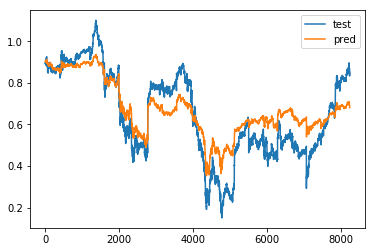

In [5]:
model.fit(X_train,y_train,epochs=
epochs,batch_size=batch_size,shuffle=False)
y_pred = model.predict(X_test)

print('训练集上的损失',model.evaluate(X_train,y_train,batch_size=batch_size))
print('测试集上的损失',model.evaluate(X_test,y_test,batch_size=batch_size))
plt.plot(y_test,label='test')
plt.plot(y_pred,label='pred')
plt.legend()
plt.show()
